# 텍스트빈도분석 - 1.영어단어분석

### 영어 단어 분석에 필요한 패키지 준비

In [41]:
from google.colab import files 
file = files.upload()

Saving myCabinetExcelData (1).xls to myCabinetExcelData (1) (2).xls
Saving myCabinetExcelData (2).xls to myCabinetExcelData (2) (2).xls
Saving myCabinetExcelData (3).xls to myCabinetExcelData (3) (2).xls
Saving myCabinetExcelData (4).xls to myCabinetExcelData (4) (2).xls
Saving myCabinetExcelData (5).xls to myCabinetExcelData (5) (2).xls
Saving myCabinetExcelData (6).xls to myCabinetExcelData (6) (2).xls
Saving myCabinetExcelData (7).xls to myCabinetExcelData (7) (2).xls
Saving myCabinetExcelData (8).xls to myCabinetExcelData (8) (2).xls
Saving myCabinetExcelData (9).xls to myCabinetExcelData (9) (2).xls
Saving myCabinetExcelData.xls to myCabinetExcelData (11).xls


In [42]:
!pip install matplotlib  

In [43]:
!pip install wordcloud  

In [44]:
!pip install nltk  

In [45]:
!pip install openpyxl
!pip install xlrd==1.2.0

In [46]:

import pandas as pd
import glob
import re
from functools import reduce

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from collections import Counter

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [47]:
import nltk     # nltk.download() 를 하기위해, import 함.

#### -주피터에서는 아나콘다에 nltk 가 기본으로 설치되어있으므로, pip으로 설치할 필요없음.
####    하지만, 최초 한번은 nltk의 리소스를 다운로드 받아야함.

In [48]:
nltk.download () # 최초 한번만 설치: download 창이 뜨면, 모두 선택하고 [Download] 버튼 클릭!

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> u

Nothing to update.

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> l
Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in

True

# 1. 데이터 준비

### 1-1. 파일 병합

### - ☺데이터를 다운 받은 시점에 따라 검색결과가 달라지므로, 결과 화면이 다를수 있습니다.☺ -

In [49]:
all_files = glob.glob('myCabinetExcelData*.xls')

all_files #출력하여 내용 확인

['myCabinetExcelData (2) (2).xls',
 'myCabinetExcelData (6) (1).xls',
 'myCabinetExcelData (10).xls',
 'myCabinetExcelData (11).xls',
 'myCabinetExcelData (7) (2).xls',
 'myCabinetExcelData (5).xls',
 'myCabinetExcelData (3) (2).xls',
 'myCabinetExcelData (6) (2).xls',
 'myCabinetExcelData.xls',
 'myCabinetExcelData (3) (1).xls',
 'myCabinetExcelData (2) (1).xls',
 'myCabinetExcelData (8).xls',
 'myCabinetExcelData (4) (2).xls',
 'myCabinetExcelData (1) (2).xls',
 'myCabinetExcelData (7) (1).xls',
 'myCabinetExcelData (1).xls',
 'myCabinetExcelData (4) (1).xls',
 'myCabinetExcelData (4).xls',
 'myCabinetExcelData (5) (2).xls',
 'myCabinetExcelData (7).xls',
 'myCabinetExcelData (8) (2).xls',
 'myCabinetExcelData (6).xls',
 'myCabinetExcelData (2).xls',
 'myCabinetExcelData (9) (2).xls',
 'myCabinetExcelData (9).xls',
 'myCabinetExcelData (5) (1).xls',
 'myCabinetExcelData (3).xls',
 'myCabinetExcelData (8) (1).xls',
 'myCabinetExcelData (9) (1).xls',
 'myCabinetExcelData (1) (1).xls']

In [50]:
!pip install openpyxl

In [51]:

all_files_data = [] #저장할 리스트 

for file in all_files:
    data_frame = pd.read_excel(file)
    all_files_data.append(data_frame)

all_files_data[0] #출력하여 내용 확인

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,SIMD parallel MCMC sampling with applications ...,"Mahani, A. S.; Sharabiani, M. T.","Elsevier Science B.V., Amsterdam.",2015
1,NaN,2,A Framework for Evaluating Design Methodologie...,Francesco Di Tria; Ezio Lefons; Filippo Tangorra,Idea Group Pub,2018
2,NaN,3,Stakeholder Perceptions and Word-of-Mouth on C...,Andrée Marie López-Fernández; Zamira Burgos Silva,"Idea Group Pub.,",2018
3,NaN,4,Efficient Skyline Computation on Big Data,"Xixian, H.; Jianzhong, L.; Donghua, Y.; Jinbao...",IEEE INSTITUTE OF ELECTRICAL AND ELECTRONICS,2013
4,NaN,5,Incremental Query Processing on Big Data Streams,"Fegaras, L.",IEEE INSTITUTE OF ELECTRICAL AND ELECTRONICS,2016
...,...,...,...,...,...,...
95,NaN,96,Big Data's Big Handprint,"Harper, Stephen; Sarni, William",THE ENVIRONMENTAL LAW INSTITUTE,2017
96,NaN,97,Data Management based Big Data Technology for ...,Lionel Nkenyereye; Jong-Wook Jang,International Information Institute,2016
97,NaN,98,"Data quality management, data usage experience...","Kwon, O.; Lee, N.; Shin, B.","Elsevier Science B.V., Amsterdam.",2014
98,NaN,99,BIG IS BEST Big isn't always best in the world...,unknown,INSTITUE OF CREDIT MANAGEMENT,2017


In [52]:
all_files_data_concat = pd.concat(all_files_data, axis=0, ignore_index=True)

all_files_data_concat #출력하여 내용 확인

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,SIMD parallel MCMC sampling with applications ...,"Mahani, A. S.; Sharabiani, M. T.","Elsevier Science B.V., Amsterdam.",2015
1,NaN,2,A Framework for Evaluating Design Methodologie...,Francesco Di Tria; Ezio Lefons; Filippo Tangorra,Idea Group Pub,2018
2,NaN,3,Stakeholder Perceptions and Word-of-Mouth on C...,Andrée Marie López-Fernández; Zamira Burgos Silva,"Idea Group Pub.,",2018
3,NaN,4,Efficient Skyline Computation on Big Data,"Xixian, H.; Jianzhong, L.; Donghua, Y.; Jinbao...",IEEE INSTITUTE OF ELECTRICAL AND ELECTRONICS,2013
4,NaN,5,Incremental Query Processing on Big Data Streams,"Fegaras, L.",IEEE INSTITUTE OF ELECTRICAL AND ELECTRONICS,2016
...,...,...,...,...,...,...
2995,NaN,96,Smart city big data analytics: An advanced review,"Soomro, Kamran; Bhutta, Muhammad Nasir Mumtaz;...",John Wiley & Sons Ltd,2019
2996,NaN,97,A watchdog approach - name-matching algorithm ...,"Kirubakaran, Anusuya; Aramudhan, M.",Inderscience,2018
2997,NaN,98,An intelligent approach to Big Data analytics ...,"Verma, Neha; Singh, Jatinder",Emerald Group Publishing Limited,2017
2998,NaN,99,How organisations leverage Big Data: a maturit...,"Comuzzi, Marco; Patel, Anit",Emerald Group Publishing Limited,2016


In [53]:
all_files_data_concat.to_csv('riss_bigdata.csv', encoding='utf-8', index = False)

### 1-2. 데이터 전처리 (Pre-processing)

In [54]:
# 제목 추출
all_title = all_files_data_concat['제목']

all_title #출력하여 내용 확인

0       SIMD parallel MCMC sampling with applications ...
1       A Framework for Evaluating Design Methodologie...
2       Stakeholder Perceptions and Word-of-Mouth on C...
3               Efficient Skyline Computation on Big Data
4        Incremental Query Processing on Big Data Streams
                              ...                        
2995    Smart city big data analytics: An advanced review
2996    A watchdog approach - name-matching algorithm ...
2997    An intelligent approach to Big Data analytics ...
2998    How organisations leverage Big Data: a maturit...
2999    Effective and efficient distributed management...
Name: 제목, Length: 3000, dtype: object

In [55]:
nltk.download('stopwords')

stopWords = set(stopwords.words("english"))
lemma = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [56]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

words = []  

for title in all_title:
    EnWords = re.sub(r"[^a-zA-Z]+", " ", str(title))    
    EnWordsToken = word_tokenize(EnWords.lower())
    EnWordsTokenStop = [w for w in EnWordsToken if w not in stopWords]
    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop]
    words.append(EnWordsTokenStopLemma)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [57]:
print(words)  #출력하여 내용 확인

[['simd', 'parallel', 'mcmc', 'sampling', 'application', 'big', 'data', 'bayesian', 'analytics'], ['framework', 'evaluating', 'design', 'methodology', 'big', 'data', 'warehouse', 'measurement', 'design', 'process'], ['stakeholder', 'perception', 'word', 'mouth', 'csr', 'dynamic', 'big', 'data', 'analysis', 'twitter'], ['efficient', 'skyline', 'computation', 'big', 'data'], ['incremental', 'query', 'processing', 'big', 'data', 'stream'], ['barrier', 'embedding', 'big', 'data', 'solution', 'smart', 'factory', 'insight', 'sap', 'consultant'], ['extracting', 'kernel', 'dataset', 'big', 'sensory', 'data', 'wireless', 'sensor', 'network'], ['insight', 'application', 'big', 'data', 'analytics', 'healthcare'], ['quantile', 'regression', 'big', 'data', 'divide', 'conquer', 'based', 'strategy'], ['review', 'sentiment', 'discovery', 'analysis', 'educational', 'big', 'data'], ['mr', 'plot', 'big', 'data', 'tool', 'distinguishing', 'distribution'], ['overview', 'online', 'based', 'platform', 'shari

In [58]:
words2 = list(reduce(lambda x, y: x+y,words))
print(words2)  #작업 내용 확인

['simd', 'parallel', 'mcmc', 'sampling', 'application', 'big', 'data', 'bayesian', 'analytics', 'framework', 'evaluating', 'design', 'methodology', 'big', 'data', 'warehouse', 'measurement', 'design', 'process', 'stakeholder', 'perception', 'word', 'mouth', 'csr', 'dynamic', 'big', 'data', 'analysis', 'twitter', 'efficient', 'skyline', 'computation', 'big', 'data', 'incremental', 'query', 'processing', 'big', 'data', 'stream', 'barrier', 'embedding', 'big', 'data', 'solution', 'smart', 'factory', 'insight', 'sap', 'consultant', 'extracting', 'kernel', 'dataset', 'big', 'sensory', 'data', 'wireless', 'sensor', 'network', 'insight', 'application', 'big', 'data', 'analytics', 'healthcare', 'quantile', 'regression', 'big', 'data', 'divide', 'conquer', 'based', 'strategy', 'review', 'sentiment', 'discovery', 'analysis', 'educational', 'big', 'data', 'mr', 'plot', 'big', 'data', 'tool', 'distinguishing', 'distribution', 'overview', 'online', 'based', 'platform', 'sharing', 'analyzing', 'elec

# 2. 데이터 탐색

## 2-1. 단어 빈도 탐색

In [59]:
count = Counter(words2)

count   #출력하여 내용 확인

Counter({'simd': 3,
         'parallel': 15,
         'mcmc': 3,
         'sampling': 9,
         'application': 75,
         'big': 4062,
         'data': 4935,
         'bayesian': 12,
         'analytics': 411,
         'framework': 78,
         'evaluating': 6,
         'design': 42,
         'methodology': 9,
         'warehouse': 42,
         'measurement': 18,
         'process': 57,
         'stakeholder': 6,
         'perception': 6,
         'word': 6,
         'mouth': 3,
         'csr': 3,
         'dynamic': 21,
         'analysis': 201,
         'twitter': 12,
         'efficient': 66,
         'skyline': 3,
         'computation': 6,
         'incremental': 9,
         'query': 18,
         'processing': 90,
         'stream': 24,
         'barrier': 6,
         'embedding': 3,
         'solution': 39,
         'smart': 102,
         'factory': 15,
         'insight': 45,
         'sap': 3,
         'consultant': 3,
         'extracting': 9,
         'kernel': 9,
       

In [60]:
word_count = dict()

for tag, counts in count.most_common(50):
    if(len(str(tag))>1):
        word_count[tag] = counts
        print("%s : %d" % (tag, counts))

data : 4935
big : 4062
analytics : 411
analysis : 201
based : 186
using : 171
science : 150
system : 150
management : 144
challenge : 141
approach : 132
mining : 120
new : 114
research : 114
model : 111
health : 111
smart : 102
cloud : 102
learning : 99
opportunity : 93
processing : 90
technology : 84
small : 81
framework : 78
information : 78
application : 75
computing : 75
social : 72
driven : 72
issue : 72
network : 69
deal : 69
quality : 69
efficient : 66
review : 66
knowledge : 66
use : 66
era : 66
healthcare : 63
perspective : 63
storage : 63
service : 63
open : 60
process : 57
platform : 57
survey : 57
making : 57
distributed : 54
market : 54
business : 54


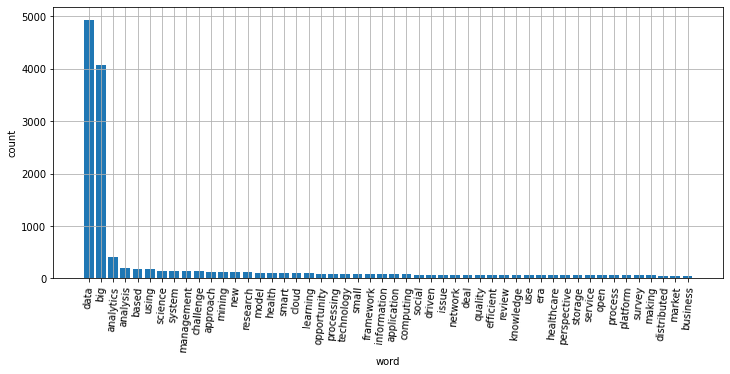

In [61]:
# 히스토그램 표시 옵션 
plt.figure(figsize=(12,5))
plt.xlabel("word")
plt.ylabel("count")
plt.grid(True)

sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(), reverse=True)

plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation='85')

plt.show()

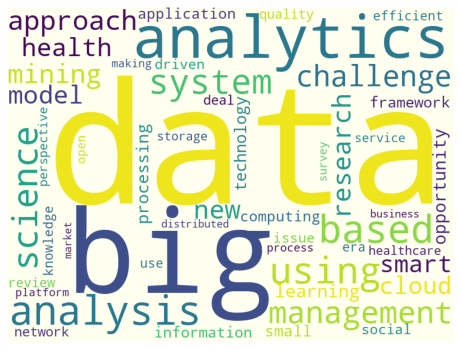

In [62]:
stopwords=set(STOPWORDS)
wc=WordCloud(background_color='ivory', stopwords=stopwords, width=800, height=600)
cloud=wc.generate_from_frequencies(word_count)

plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

#### 여기서 잠깐!! : 검색어로 사용한 big'과 'data' 빈도가 압도적으로 많으므로, 이를 제거한다.

In [63]:
#검색어로 사용한 'big'과 'data' 항목 제거 하기
del word_count['big']
del word_count['data']

## 2-2 단어 빈도 히스토그램

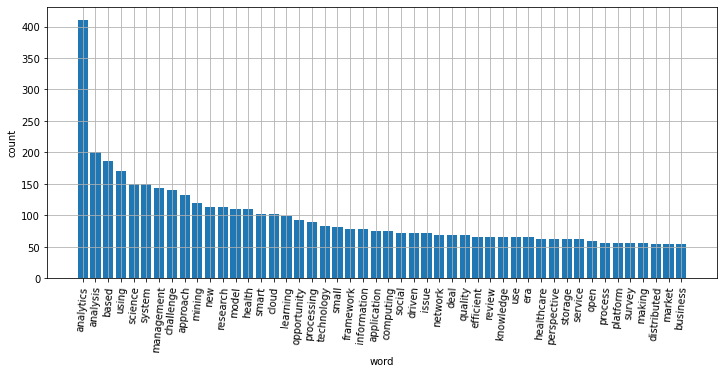

In [64]:
# 히스토그램 표시 옵션 
plt.figure(figsize=(12,5))
plt.xlabel("word")
plt.ylabel("count")
plt.grid(True)

sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(), reverse=True)

plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation='85')

plt.show()

# 3. 분석 모델 구축 및 결과 시각화

## 3-1. 연도별 데이터 수

In [65]:
all_files_data_concat['doc_count'] = 0
summary_year = all_files_data_concat.groupby('출판일', as_index=False)['doc_count'].count()
summary_year  #출력하여 내용 확인

,출판일,doc_count
0,1994,3
1,1995,3
2,1996,3
3,1998,9
4,2002,12
5,2003,3
6,2004,9
7,2005,9
8,2007,6
9,2008,9


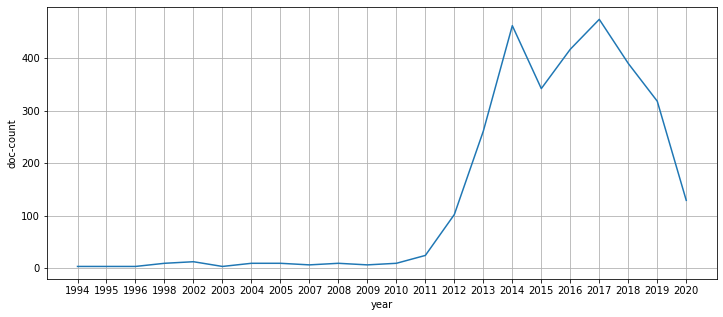

In [66]:
plt.figure(figsize=(12,5))
plt.xlabel("year")
plt.ylabel("doc-count")
plt.grid(True)

plt.plot(range(len(summary_year)), summary_year['doc_count'])
plt.xticks(range(len(summary_year)), [text for text in summary_year['출판일']])

plt.show()

## 3-2. 워드클라우드

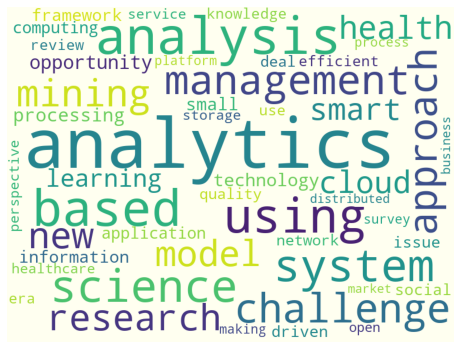

In [67]:
stopwords=set(STOPWORDS)
wc=WordCloud(background_color='ivory', stopwords=stopwords, width=800, height=600)
cloud=wc.generate_from_frequencies(word_count)

plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

#### - 워드 클라우드에 나타나는 단어의 위치는 실행 할 때마다 달라진다. ☺

In [68]:
cloud.to_file("riss_bigdata_wordCloud.jpg")